# Python Assignment Spring 2021
## Nick Topping

Install biopython if you haven't already

In [1]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [16]:
print('hello world')

hello world


In [73]:
import Bio #imports the package
from Bio import SeqIO
from Bio import Seq
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import GC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

If biopython is not installed, use the command "$ conda install biopython" in your terminal window or "

## Function 1: Gets the sequences from bears_cytb.fasta and document Dr. X's code

I documented Dr. X's function below

In [3]:
def get_sequences_from_file(fasta_fn): #defines a new function called "get_sequences_from_file" from our fasta file that contains multiple sequences
    sequence_data_dict = {} #creates an empty dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): #This function identifies sequences within our fasta file for every record
        description = record.description.split() #creates a new variable "description" and splits the entries
        species_name = description[1] + " " + description[2] #creates the species name from the file
        sequence_data_dict[species_name] = record.seq #assigns the correct sequence to the correct species name
    return(sequence_data_dict) #returns the dictionary

## Function 2: Write a function from Dr. X's provided pseudocode to translate nucleotides into amino acids (with documentation)

Check to see what the provided function does

In [4]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [5]:
def translate_function(string_nucleotides): #defines a new function to translate the nucleotides
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # imports in a codon table of vertebrate mitochodnrial DNA
    aa_seq_strings = [] #creates a new variable to store the amino acids sequences in
    for i in range(0, len(string_nucleotides), 3):
        codon = string_nucleotides[i:i+3] #identifies a codon as a set of 3 nucleotides 
        if codon == "TAA" or codon == "TAG" or codon == "AGA" or codon == "AGG": # identifies a stop codon
            break #will stop the function right before the stop codon
        else: #will continue the function 
            aa_seq_strings += mito_table.forward_table[codon] #translates each codon into an amino acid
    return(aa_seq_strings) #returns the completed amino acid sequence

# Function 3: Write an alternative function to translate nucleotide sequences to amino acids

In [45]:
def translate_function_alternative(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = str(Seq.translate(string_nucleotides, mito_table))[:-1]
    return(aa_seq_string)

Did it work?

In [46]:
dna_to_aa_sequence_example = "GATCGCTACTCTAGTATCAGT" #create a new variable with a short DNA sequence
translate_function_alternative(dna_to_aa_sequence_example) #example from Function 2

'DRYSSI'

# Function 4: Write a function that calculates the molecular weight of each amino acid sequence

In [42]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis #use this to load in the ProteinAnalysis function from ProtParam in BioPython
def aa_molecular_weight(aa_seq): #define function for computing the molecular weight of an amino acid sequence
    analysed_aa = ProteinAnalysis(aa_seq) #uses the ProteinAnalysis function to calculate the molecular weight of the sequence
    return (analysed_aa.molecular_weight()) #returns the molecular weight of the sequence

Did it work?

In [43]:
aa_sequence_example = "TURTLES" #new example sequence, each letter is an amino acid
aa_molecular_weight(aa_sequence_example) #function 4 with example sequence

855.7956

# Function 5: Write a function that calculates the GC content

In [55]:
#I found this function on a website with documentation about the biopython package https://biopython.org/docs/1.75/api/Bio.SeqUtils.html
def compute_gc_content(nucleotides):
    gc_content = GC(nucleotides) #test using the example DNA sequence I made up earlier
#this gives the GC content in a percentage of the total DNA sequence
    return(gc_content)

In [61]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 

bears_df = pd.read_csv("bears_mass.csv") #body mass data for each bear species
species_list = list(bears_df.species)

# Main

In [48]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") #gets the sequences from the fasta file

bears_df = pd.read_csv("bears_mass.csv") #reads the body mass data for each bear species into a data frame
species_list = list(bears_df.species)

# Function 6: Add two new columns with the molecular weight data and the GC content data

In [89]:
print(bears_df) #shows what the unaltered data frame looks like with a column for species name and a column for mass values
bears_df['molecular_weight'] = 'NaN' #creates a new column with the header "molecular_weight"
bears_df['GC_content'] = 'NaN' #creates a new column with the header "GC_content"
print(bears_df) #prints the data frame with the two new columns to the right of the original data
#all values are set to 'NaN' indicating that they are empty cells

                  species     mass molecular_weight GC_content
0          Ursus spelaeus  550.800              NaN        NaN
1            Ursus arctos  203.500              NaN        NaN
2        Ursus thibetanus   99.714              NaN        NaN
3        Melursus ursinus  100.030              NaN        NaN
4        Ursus americanus  110.560              NaN        NaN
5     Helarctos malayanus   47.020              NaN        NaN
6  Ailuropoda melanoleuca  118.200              NaN        NaN
7      Tremarctos ornatus  140.700              NaN        NaN
8         Ursus maritimus  425.100              NaN        NaN
                  species     mass molecular_weight GC_content
0          Ursus spelaeus  550.800              NaN        NaN
1            Ursus arctos  203.500              NaN        NaN
2        Ursus thibetanus   99.714              NaN        NaN
3        Melursus ursinus  100.030              NaN        NaN
4        Ursus americanus  110.560              NaN    

# Function 7: Write a for loop that translates each sequence and also gets molecular weight and computes the GC content

In [75]:
row = 0
for key, value in cytb_seqs.items():
    aa_seq = translate_function_alternative(value)
    computed_molecular_weight = aa_molecular_weight(aa_seq)
    bears_df.loc[row, "molecular_weight"] = computed_molecular_weight
    computed_gc_content = GC(value)
    bears_df.loc[row, "GC_content"] = computed_gc_content
    row = row + 1
print(bears_df)

                  species     mass  molecular_weight  GC_content
0          Ursus spelaeus  550.800        42458.7992   43.771930
1            Ursus arctos  203.500        42414.7435   43.771930
2        Ursus thibetanus   99.714        42306.6735   45.614035
3        Melursus ursinus  100.030        42551.9900   45.175439
4        Ursus americanus  110.560        42427.7439   43.947368
5     Helarctos malayanus   47.020        42560.8910   44.298246
6  Ailuropoda melanoleuca  118.200        42702.1845   40.789474
7      Tremarctos ornatus  140.700        42384.8266   44.385965
8         Ursus maritimus  425.100        42454.7873   44.298246


# Function 8: Plot a bar chart of the species weights with species on the x axis and mass on the y axis

<AxesSubplot:title={'center':'Mass of 8 different ursid species'}, xlabel='species'>

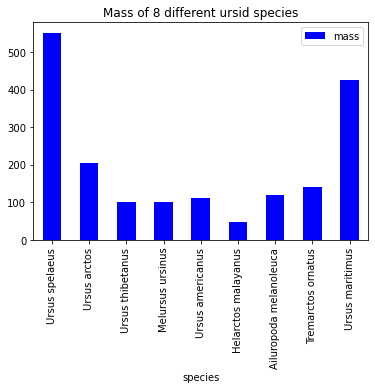

In [68]:
bears_df.plot(kind='bar', x='species', y='mass', color='blue', title='Mass of 8 different ursid species')
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the largest bear species? 
## *Q2* What else is interesting about this species?

# Function 9: Plot the GC content (x axis) vs. molecular weight (y axis)

<AxesSubplot:xlabel='GC_content', ylabel='molecular_weight'>

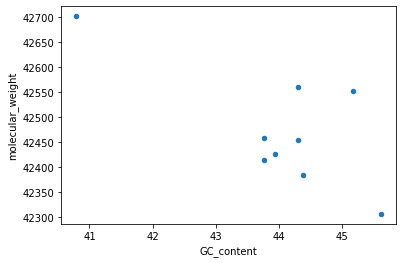

In [77]:
bears_df.plot(x = 'GC_content', y = 'molecular_weight', kind ='scatter')
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

# Function 10: Save the new data frame to a file called "bears_mass_cytb.csv"

In [ ]:
bears_df.to_bears_mass_cytb.csv